# Assignment 8 - Perceptron & MLP

### This week only has one assignment for all tracks of the course.

Please submit your solution of this notebook in the Whiteboard at the corresponding Assignment entry as .ipynb-file and as .pdf. <br><br>
Please do **NOT** rename the file!

#### State both names of your group members here:
[Rashid Harvey and S M Shameem]

## Task 8.1: Perceptron

* Implement the single `Perceptron` Model class. **(RESULTS)**
* Train your Perceptron model to solve on the `AND gate` using `gradient descent`. Report in the results, can it predict the correct outputs for each of the 4 input combinations? **(RESULTS)**
* Now train your Perceptron model to solve on the `XOR gate` using `gradient descent`. Report in the results. **(RESULTS)**
* Finally, plot the decision boundary for both trained Perceptron models. **(RESULTS)**

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.1, n_epochs=100):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None
    
    def _step_function(self, z):
        """Step activation function: returns 1 if z >= 0, else 0"""
        return np.where(z >= 0, 1, 0)
    
    def fit(self, X, y):
        """Train the perceptron using gradient descent"""
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for epoch in range(self.n_epochs):
            for i in range(n_samples):
                # Compute linear output
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_pred = self._step_function(linear_output)
                
                # Update weights and bias using perceptron learning rule
                error = y[i] - y_pred
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error
        
        return self
    
    def predict(self, X):
        """Predict class labels for samples in X"""
        linear_output = np.dot(X, self.weights) + self.bias
        return self._step_function(linear_output)

In [11]:
# Dataset for AND and XOR gates
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_AND = np.array([0, 0, 0, 1])  # AND gate
y_XOR = np.array([0, 1, 1, 0])  # XOR gate

In [12]:
# Train Perceptron on AND gate
print("=" * 50)
print("Training Perceptron on AND Gate")
print("=" * 50)

perceptron_and = Perceptron(learning_rate=0.1, n_epochs=100)
perceptron_and.fit(X, y_AND)

print("\nAND Gate Results:")
print("-" * 30)
for i in range(len(X)):
    pred = perceptron_and.predict(X[i:i+1])[0]
    print(f"Input: {X[i]} -> Predicted: {pred}, Actual: {y_AND[i]}, Correct: {pred == y_AND[i]}")

all_correct_and = np.all(perceptron_and.predict(X) == y_AND)
print(f"\nAll predictions correct: {all_correct_and}")

# Train Perceptron on XOR gate
print("\n" + "=" * 50)
print("Training Perceptron on XOR Gate")
print("=" * 50)

perceptron_xor = Perceptron(learning_rate=0.1, n_epochs=100)
perceptron_xor.fit(X, y_XOR)

print("\nXOR Gate Results:")
print("-" * 30)
for i in range(len(X)):
    pred = perceptron_xor.predict(X[i:i+1])[0]
    print(f"Input: {X[i]} -> Predicted: {pred}, Actual: {y_XOR[i]}, Correct: {pred == y_XOR[i]}")

all_correct_xor = np.all(perceptron_xor.predict(X) == y_XOR)
print(f"\nAll predictions correct: {all_correct_xor}")
print("\nNote: The XOR problem is NOT linearly separable, so a single Perceptron cannot solve it!")

Training Perceptron on AND Gate

AND Gate Results:
------------------------------
Input: [0 0] -> Predicted: 0, Actual: 0, Correct: True
Input: [0 1] -> Predicted: 0, Actual: 0, Correct: True
Input: [1 0] -> Predicted: 0, Actual: 0, Correct: True
Input: [1 1] -> Predicted: 1, Actual: 1, Correct: True

All predictions correct: True

Training Perceptron on XOR Gate

XOR Gate Results:
------------------------------
Input: [0 0] -> Predicted: 1, Actual: 0, Correct: False
Input: [0 1] -> Predicted: 1, Actual: 1, Correct: True
Input: [1 0] -> Predicted: 0, Actual: 1, Correct: False
Input: [1 1] -> Predicted: 0, Actual: 0, Correct: True

All predictions correct: False

Note: The XOR problem is NOT linearly separable, so a single Perceptron cannot solve it!


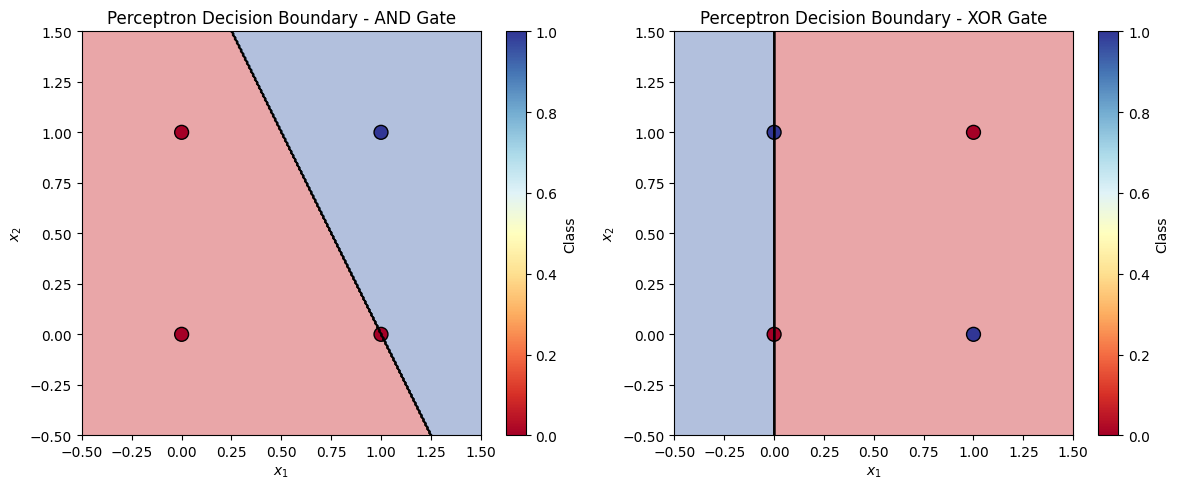


Observation: The AND gate is linearly separable, so the perceptron finds a valid decision boundary.
The XOR gate is NOT linearly separable, so no single line can correctly classify all points.


In [4]:
# Plot decision boundaries for both Perceptron models
def plot_decision_boundary_perceptron(perceptron, X, y, title):
    """Plot the decision boundary of a trained perceptron"""
    # Create a mesh grid
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # Predict for each point in the mesh
    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    plt.contour(xx, yy, Z, colors='k', linewidths=0.5)
    
    # Plot the data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='black', s=100)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(title)
    plt.colorbar(scatter, label='Class')

# Create subplots for both models
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_boundary_perceptron(perceptron_and, X, y_AND, 'Perceptron Decision Boundary - AND Gate')

plt.subplot(1, 2, 2)
plot_decision_boundary_perceptron(perceptron_xor, X, y_XOR, 'Perceptron Decision Boundary - XOR Gate')

plt.tight_layout()
plt.show()

print("\nObservation: The AND gate is linearly separable, so the perceptron finds a valid decision boundary.")
print("The XOR gate is NOT linearly separable, so no single line can correctly classify all points.")

## Task 8.2: Multi-Layer Perceptron (MLP)

* Use the `PyTorch` framework to build a small MLP. **(RESULTS)**
* Train your MLP on the `XOR gate` using `PyTorch`'s `autograd` functionality. Report on the result. Can your model solve the XOR problem? Test it for all 4 input combinations. **(RESULTS)**
* Plot the decision boundary of your trained MLP. **(RESULTS)**

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        # Define the layers
        self.hidden = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)
        self.activation = nn.Sigmoid()  # Using sigmoid for binary classification
    
    def forward(self, x):
        # Forward pass through the network
        x = self.activation(self.hidden(x))
        x = self.activation(self.output(x))
        return x

In [13]:
def train(model, X, y, n_epochs=5000, learning_rate=0.5):
    """Train the MLP using PyTorch's autograd functionality"""
    # Convert numpy arrays to PyTorch tensors
    X_tensor = torch.FloatTensor(X)
    y_tensor = torch.FloatTensor(y).reshape(-1, 1)
    
    # Define loss function and optimizer
    criterion = nn.BCELoss()  # Binary Cross Entropy Loss
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    
    losses = []
    
    for epoch in range(n_epochs):
        # Forward pass
        outputs = model(X_tensor)
        loss = criterion(outputs, y_tensor)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
        
        if (epoch + 1) % 1000 == 0:
            print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')
    
    return losses

def test(model, X, y):
    """Test the MLP and report results"""
    X_tensor = torch.FloatTensor(X)
    
    with torch.no_grad():
        outputs = model(X_tensor)
        predictions = (outputs >= 0.5).float().numpy().flatten()
    
    print("\nTest Results:")
    print("-" * 40)
    for i in range(len(X)):
        pred = int(predictions[i])
        actual = y[i]
        correct = pred == actual
        print(f"Input: {X[i]} -> Predicted: {pred}, Actual: {actual}, Correct: {correct}")
    
    accuracy = np.mean(predictions == y)
    print(f"\nAccuracy: {accuracy * 100:.2f}%")
    print(f"All predictions correct: {accuracy == 1.0}")
    
    return predictions

Training MLP on XOR Gate
Epoch [1000/5000], Loss: 0.0148
Epoch [2000/5000], Loss: 0.0045
Epoch [3000/5000], Loss: 0.0025
Epoch [4000/5000], Loss: 0.0017
Epoch [5000/5000], Loss: 0.0013

Test Results:
----------------------------------------
Input: [0 0] -> Predicted: 0, Actual: 0, Correct: True
Input: [0 1] -> Predicted: 1, Actual: 1, Correct: True
Input: [1 0] -> Predicted: 1, Actual: 1, Correct: True
Input: [1 1] -> Predicted: 0, Actual: 0, Correct: True

Accuracy: 100.00%
All predictions correct: True


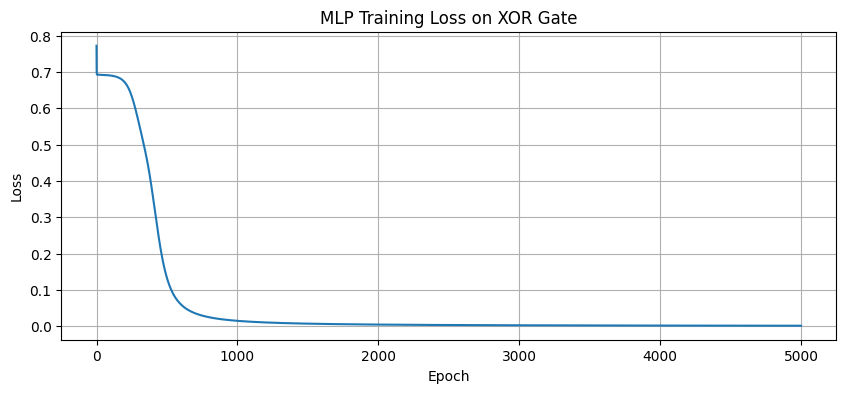


Conclusion: The MLP with a hidden layer CAN solve the XOR problem!
This is because the hidden layer allows the network to learn non-linear decision boundaries.


In [14]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Create MLP model
mlp = MLP(input_size=2, hidden_size=4, output_size=1)

print("=" * 50)
print("Training MLP on XOR Gate")
print("=" * 50)

# Train the model
losses = train(mlp, X, y_XOR, n_epochs=5000, learning_rate=1.0)

# Test the model
predictions = test(mlp, X, y_XOR)

# Plot training loss
plt.figure(figsize=(10, 4))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MLP Training Loss on XOR Gate')
plt.grid(True)
plt.show()

print("\nConclusion: The MLP with a hidden layer CAN solve the XOR problem!")
print("This is because the hidden layer allows the network to learn non-linear decision boundaries.")

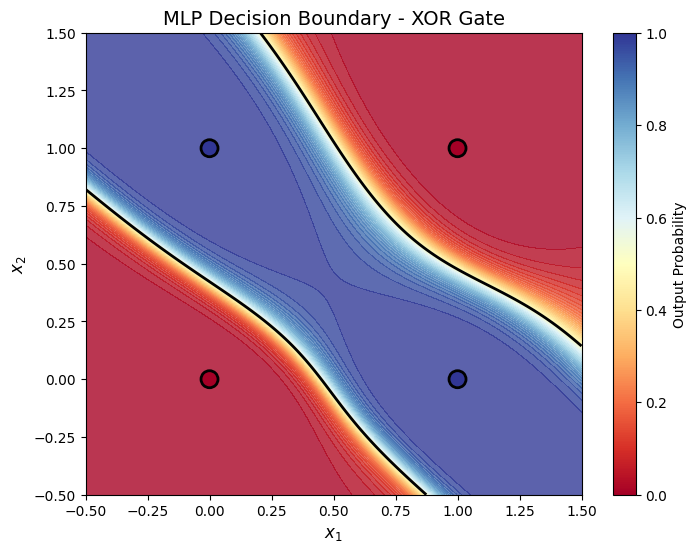

The black contour line represents the decision boundary (output = 0.5).
The MLP creates a non-linear boundary that correctly separates the XOR classes!


In [16]:
# Plot decision boundary for MLP
def plot_decision_boundary_mlp(model, X, y, title):
    """Plot the decision boundary of a trained MLP"""
    # Create a mesh grid
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # Predict for each point in the mesh
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.FloatTensor(grid)
    
    with torch.no_grad():
        Z = model(grid_tensor).numpy()
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdYlBu')
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
    
    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='black', s=150, linewidths=2)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('$x_1$', fontsize=12)
    plt.ylabel('$x_2$', fontsize=12)
    plt.title(title, fontsize=14)
    plt.colorbar(label='Output Probability')
    plt.show()

# Plot the MLP decision boundary
plot_decision_boundary_mlp(mlp, X, y_XOR, 'MLP Decision Boundary - XOR Gate')

print("The black contour line represents the decision boundary (output = 0.5).")
print("The MLP creates a non-linear boundary that correctly separates the XOR classes!")

## Congratz, you made it! :)